# Assignment-1

Due on September, 27.


**Points: 90**\
Brilliant!

KRATIKA AGGARWAL 
DATA 690 Fall'22

This exercise will require you to pull some data from the `yahoo finance`. Yahoo finance is currently the one of most widely used API of financial market data.

Yahoo finance has a large number of data sources, but, you restrict your attention to the extraction of the stock price.

For this assignment, we will focus on Apple and Microsoft stock prices data from the S&P-500, a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States. You'll analyze these stock prices. These company are listed under the stock ticker `aapl` and `msft`.

These are your tasks for this mini project:

1. Collect daily closing price stock price of Apple and Microsoft covering the period of 2020-01-01 - 2021-01-01 (keep in mind that the date format is YYYY-MM-DD). (15 pts)
2. Draw the line plot for the stock prices and interpret the stock price movement, if there is any. (15 pts)
3. Calculate stock return of Apple and Microsoft in this period. (15 pts)
4. What is the largest return of these companies during this period? (15 pts)
5. Draw the histogram of the returns and interpret the distributions you obtained. (15 pts)
6. Use QQ plot and see if the stock returns follow normal distribution. (15 pts)
7. Calculate the correlation coefficient between these stock returns and interpret. (10 pts)



In [ ]:
# answers here

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

### Task 1

In [ ]:
stocks = ['AAPL', 'MSFT']
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 1, 1)
port = yf.download(stocks, start=start, end=end, interval='1d')

[*********************100%***********************]  2 of 2 completed


In [ ]:
port.head()

Adj Close                  Close                   High  \
                 AAPL        MSFT       AAPL        MSFT       AAPL   
Date                                                                  
2020-01-02  73.683571  156.592010  75.087502  160.619995  75.150002   
2020-01-03  72.967201  154.642136  74.357498  158.619995  75.144997   
2020-01-06  73.548637  155.041855  74.949997  159.029999  74.989998   
2020-01-07  73.202728  153.628265  74.597504  157.580002  75.224998   
2020-01-08  74.380280  156.075287  75.797501  160.089996  76.110001   

                              Low                   Open              \
                  MSFT       AAPL        MSFT       AAPL        MSFT   
Date                                                                   
2020-01-02  160.729996  73.797501  158.330002  74.059998  158.779999   
2020-01-03  159.949997  74.125000  158.059998  74.287498  158.320007   
2020-01-06  159.100006  73.187500  156.509995  73.447502  157.080002   
2020-01-07  159.669998  74.370003  157.320007  74.959999  159.320007   
2020-01-08  160.800003  74.290001  157.949997  74.290001  158.929993   

               Volume            
                 AAPL      MSFT  
Date                             
2020-01-02  135480400  22622100  
2020-01-03  146322800  21116200  
2020-01-06  118387200  20813700  
2020-01-07  108872000  21634100  
2020-01-08  132079200  27746500

In [ ]:
port_close = port['Close']
port_close

,AAPL,MSFT
Date,,
2020-01-02,75.087502,160.619995
2020-01-03,74.357498,158.619995
2020-01-06,74.949997,159.029999
2020-01-07,74.597504,157.580002
2020-01-08,75.797501,160.089996
...,...,...
2020-12-24,131.970001,222.750000
2020-12-28,136.690002,224.960007
2020-12-29,134.869995,224.149994


(15 Points)

### Task 2

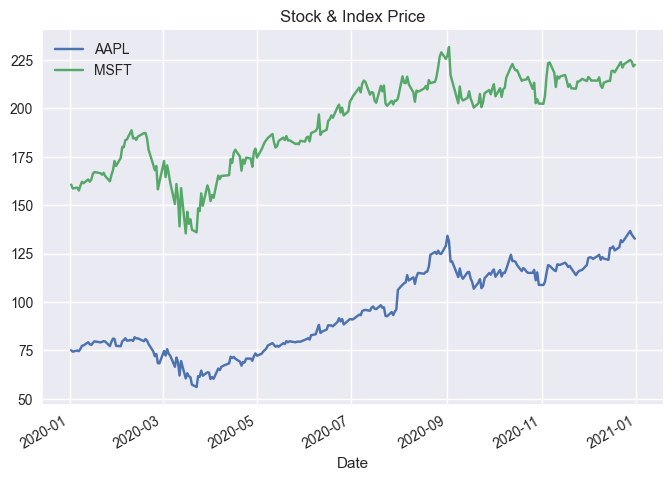

In [ ]:
port_close.plot()
plt.xlabel('Date')
plt.title('Stock & Index Price')
plt.show()

Interpretation:
1. AAPL & MSFT stocks both went down during March-May 2020 when the global pandemic had it's first peak.
2. AAPL had an all time record high at the time in August 2020, and then plunged drastically. Some think it's because of the 4 to 1 stock split, others because of the disappointing launch event.

(15 Points)

### Task 3

In [ ]:
AAPL_daily_returns = port_close['AAPL'].pct_change()
AAPL_monthly_returns = port_close['AAPL'].resample('M').ffill().pct_change()

In [ ]:
print(AAPL_daily_returns)
print(AAPL_monthly_returns)

Date
2020-01-02         NaN
2020-01-03   -0.009722
2020-01-06    0.007968
2020-01-07   -0.004703
2020-01-08    0.016086
                ...   
2020-12-24    0.007712
2020-12-28    0.035766
2020-12-29   -0.013315
2020-12-30   -0.008527
2020-12-31   -0.007703
Name: AAPL, Length: 253, dtype: float64
Date
2020-01-31         NaN
2020-02-29   -0.116798
2020-03-31   -0.069761
2020-04-30    0.155374
2020-05-31    0.082165
2020-06-30    0.147386
2020-07-31    0.165132
2020-08-31    0.214380
2020-09-30   -0.102526
2020-10-31   -0.060012
2020-11-30    0.093606
2020-12-31    0.114574
Freq: M, Name: AAPL, dtype: float64


In [ ]:
MSFT_daily_returns = port_close['MSFT'].pct_change()
MSFT_monthly_returns = port_close['MSFT'].resample('M').ffill().pct_change()

In [ ]:
print(MSFT_daily_returns)
print(MSFT_monthly_returns)

Date
2020-01-02         NaN
2020-01-03   -0.012452
2020-01-06    0.002585
2020-01-07   -0.009118
2020-01-08    0.015928
                ...   
2020-12-24    0.007827
2020-12-28    0.009921
2020-12-29   -0.003601
2020-12-30   -0.011019
2020-12-31    0.003338
Name: MSFT, Length: 253, dtype: float64
Date
2020-01-31         NaN
2020-02-29   -0.048288
2020-03-31   -0.026541
2020-04-30    0.136326
2020-05-31    0.022543
2020-06-30    0.110559
2020-07-31    0.007371
2020-08-31    0.100093
2020-09-30   -0.067397
2020-10-31   -0.037370
2020-11-30    0.057292
2020-12-31    0.039006
Freq: M, Name: MSFT, dtype: float64


(15 Points)

### Task 4 

In [ ]:
np.max(AAPL_daily_returns)

0.11980826654731591

In [ ]:
np.max(AAPL_monthly_returns)


0.21437973547842848

In [ ]:
np.max(MSFT_daily_returns)

0.14216888119914373

In [ ]:
np.max(MSFT_monthly_returns)

0.13632616248002183

(15 Points)

### Task 5 

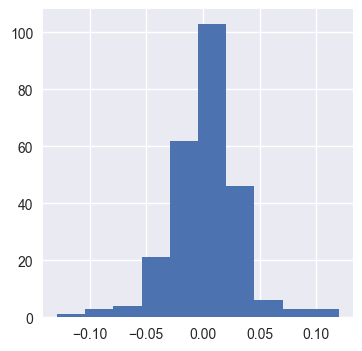

In [ ]:
plt.figure(figsize=(4,4))
AAPL_daily_returns.hist();

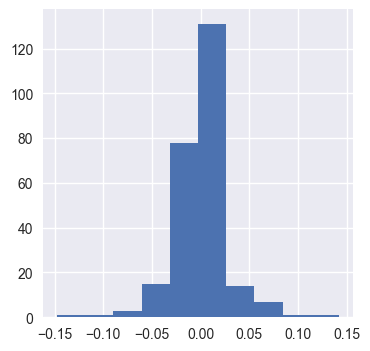

In [ ]:
plt.figure(figsize=(4,4))
MSFT_daily_returns.hist();

**Remark:** No interpretation.\
(10 Points)

### Task 6 

In [ ]:
!pip install statsmodels

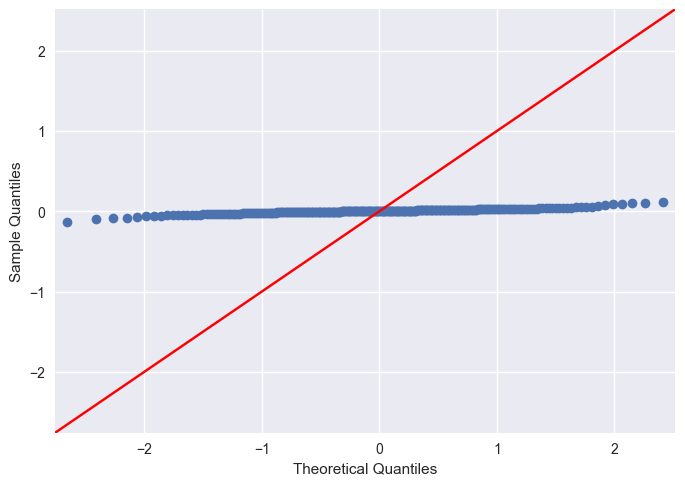

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(AAPL_daily_returns, line='45')
plt.show()

As the data does not even remotely follow the 45 degree line, it is safe to say that the data is not normally distributed.

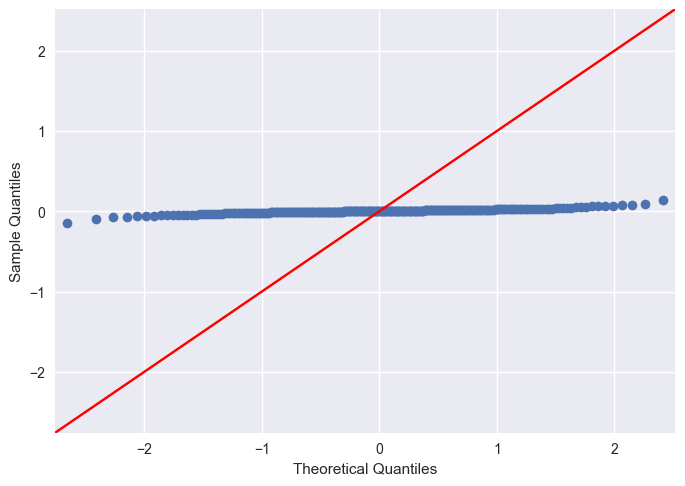

In [ ]:
import statsmodels.api as sm
fig = sm.qqplot(MSFT_daily_returns, line='45')
plt.show()

As the data does not even remotely follow the 45 degree line, it is safe to say that the data is not normally distributed.

**Remark**: Daily returns are nearly normal. More specifically, they follow leptokurtic distribution. They have fat tails, therefore they diverge on tails.\
In the qqplot() function the hyperparameter line should by "s".\
(10 Points)

### Task 7 

In [ ]:
port_close.corr()

,AAPL,MSFT
AAPL,1.000000,0.930717
MSFT,0.930717,1.000000


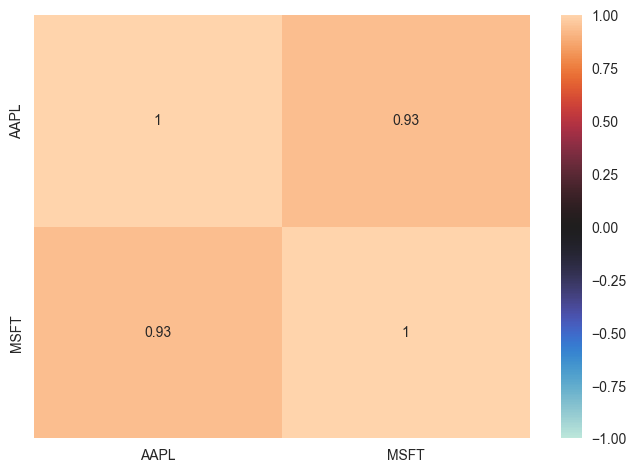

In [ ]:
sns.heatmap(port_close.corr(),annot=True,vmin=-1, vmax=1, center=0);

In [ ]:
port=port_close.resample('M').ffill().pct_change()
port

,AAPL,MSFT
Date,,
2020-01-31,NaN,NaN
2020-02-29,-0.116798,-0.048288
2020-03-31,-0.069761,-0.026541
2020-04-30,0.155374,0.136326
2020-05-31,0.082165,0.022543
2020-06-30,0.147386,0.110559
2020-07-31,0.165132,0.007371
2020-08-31,0.214380,0.100093
2020-09-30,-0.102526,-0.067397


In [ ]:
port.corr()

,AAPL,MSFT
AAPL,1.000000,0.867116
MSFT,0.867116,1.000000


AAPL and MSFT seem to have a strongly positive correlation with each other i.e. it is not the volatility of one that causes the rise or fall of the other they just appear to be increasing as the other is increasing and decreasing when the other is decreasing. 

**Remark:** Correlation between daily returns was supposed to be computed. However, no deductions for that. (10 Points)